# Data Visualization using Seaborn (Tips dataset)

We need to visualize data properly to understand how variables in a dataset relate to each other and how those relationships depend on other variables.

**Seaborn** 
- statistical plotting library based on matplotlib 
- work very well with Pandas dataframe objects

**Structure of this Notebook:**

**1. Dataset - at a glance**

**2. Data Visualization**

    a. Frequency Distribution - Categorical Variables 
        * countplot 
        * catplot
        
    b. Distribution of the Numerical Variable** 
        * distplot(histogram)
        * kdeplot
        * boxplot
        * violinplot
        
    c. Relationship between 2 Numerical Variables
        * lineplot
        * scatterplot
        * relplot
        * jointplot
        * kdeplot
        * lmplot
        * heatmap
        * pairplot
        * facetgrid
        
    d. Relationship between Numerical and Categorical Variables 
        * pointplot
        * barplot
        * boxplot
        * violinplot
        * swarmplot
        * catplot
        * facetgrid
        
 **Remark**: *I used subplot to plot two or more plots in one figure.* 

## 1. Dataset - at a glance

In [1]:
# importing required libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# loading dataset
# tips_raw = pd.read_csv(tips_dataset)

df = sns.load_dataset("tips")
print(df.head(6))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4


In [3]:
# get information about a dataset (dtype, non-null values, memory usage)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


In [4]:
# Lets find the labels in categorical variables
print('sex', df['sex'].unique())
print('smoker', df['smoker'].unique())
print('day', df['day'].unique())
print('time', df['time'].unique())

sex ['Female', 'Male']
Categories (2, object): ['Male', 'Female']
smoker ['No', 'Yes']
Categories (2, object): ['Yes', 'No']
day ['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']
time ['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']


In [5]:
# (SKIP) 
# stats
print(df.describe()) # only for numerical variables 
print("###################")
# correlation matrix
print(df.corr(numeric_only=True))

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000
###################
            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


####  So, what do I know about dataset?

- The *tips* dataset has 7 columns (features) and 244 rows (observations,samples).\
  *Numerical* columns are:
    - *total_bill* (continuous) - the amount of the total bill   
    - *tip* (continuous) - the amount of the tip paid on the bill
    - *size* (discrete) - the number of total people served

  *Categorical* columns are:
    - *sex* (Male/Female) - the gender of the person who paid the bill
    - *smoker* (Yes/No) - whether or not the person who paid the bill is a smoker 
    - *day* (Thur/Fri/Sat/Sun) - the day when the person paid the bill
    - *time* (Lunch/Dinner) - the time of the day i.e. lunch or dinner

- There is no missing values.
- tip is in interval [1,10] with overall average tip approx.3 (with standard deviation 1.4) and median 3.6  
- total_bill is approx. between 3 and 51 with overall average 20 (with standard deviation 9) and median 24
- positive correlation (>1) among numerical variables
- the strongest relationship is between total_bill and tip (0.7)

## 2. Visualization 

### **a. Frequency Distribution - Categorical Variables**

###  * COUNT PLOT

- show value counts for a single categorical variable
- can be thought of as a histogram across a categorical, instead of quantitative, variable.

sex
Male      157
Female     87
Name: count, dtype: int64


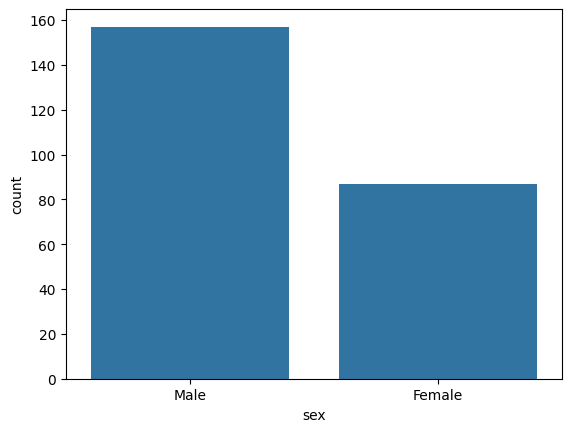

In [6]:
#Show vertical count: sex, smoker, day, time, size

sns.countplot(data=df, x='sex', ) # # NOTE do this for sex, smoker, day, time, size
# sns.despine() # no top and right axes spine

print(df['sex'].value_counts())

# obs.: it appears that most people come in pairs(i.e. size=2 is very high)

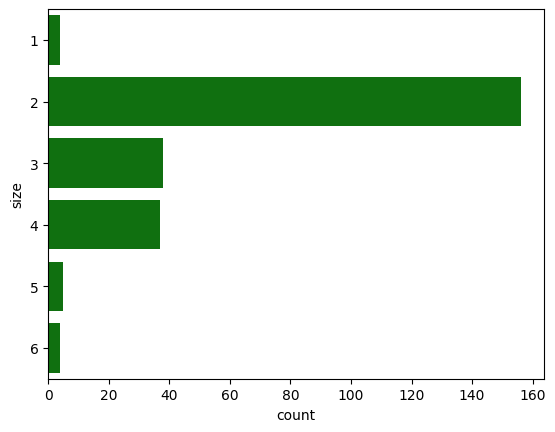

sex
Male      157
Female     87
Name: count, dtype: int64


In [7]:
# countplot in horizontal
sns.countplot(data=df, y = 'size', color='green') # NOTE do this for sex, smoker, day, time, size
plt.show()

print(df['sex'].value_counts())

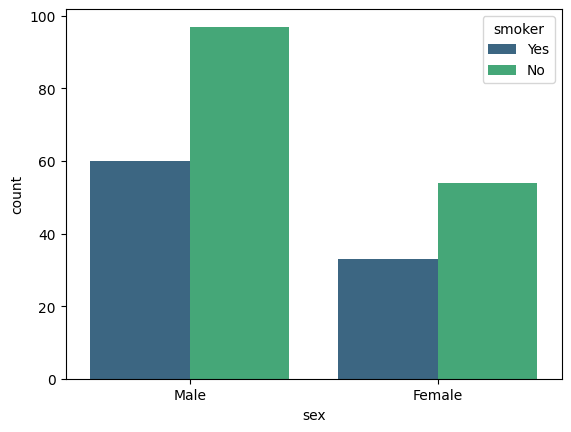

In [8]:
# show value counts for two categorical variables
sns.countplot( data=df, x='sex', hue='smoker', palette='viridis') # NOTE do this for sex, smoker, day, time, size
plt.show()

So, we see that:
- Man paid mostly
- No smokers paid mostly
- Male-No smoker paid mostly
- Male-No smoker paid more often then Male-smoker
- Female-smoker paid the most rarly
- ...

### * CATPLOT
- show the relationship between a numerical and one or more categorical variables 
- coulds use one of several visual representations (boxplot, swarmplot, violinplot,...)

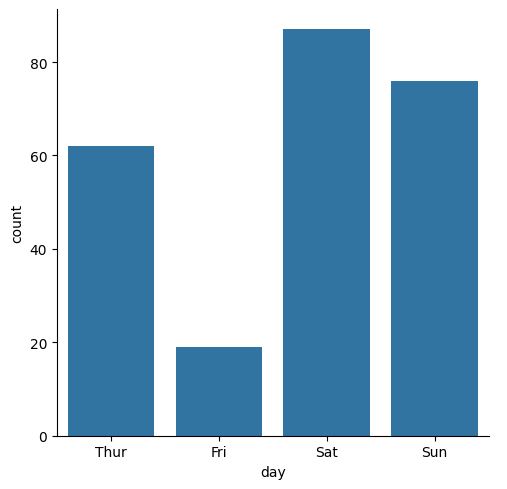

In [9]:
# - do the same as count plot with parametar kind='count'
# show value counts for two categorical variables
sns.catplot(data=df, x='day', kind='count')
plt.show()

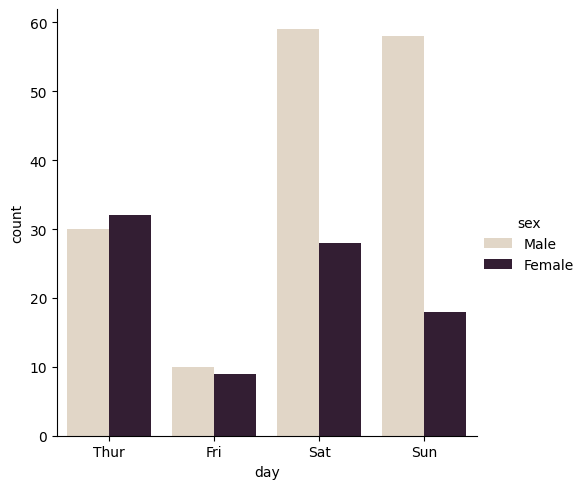

In [10]:
#Lets break down count further based sex 
sns.catplot(data=df, x='day', hue='sex', palette='ch:.25', kind='count')
plt.show()

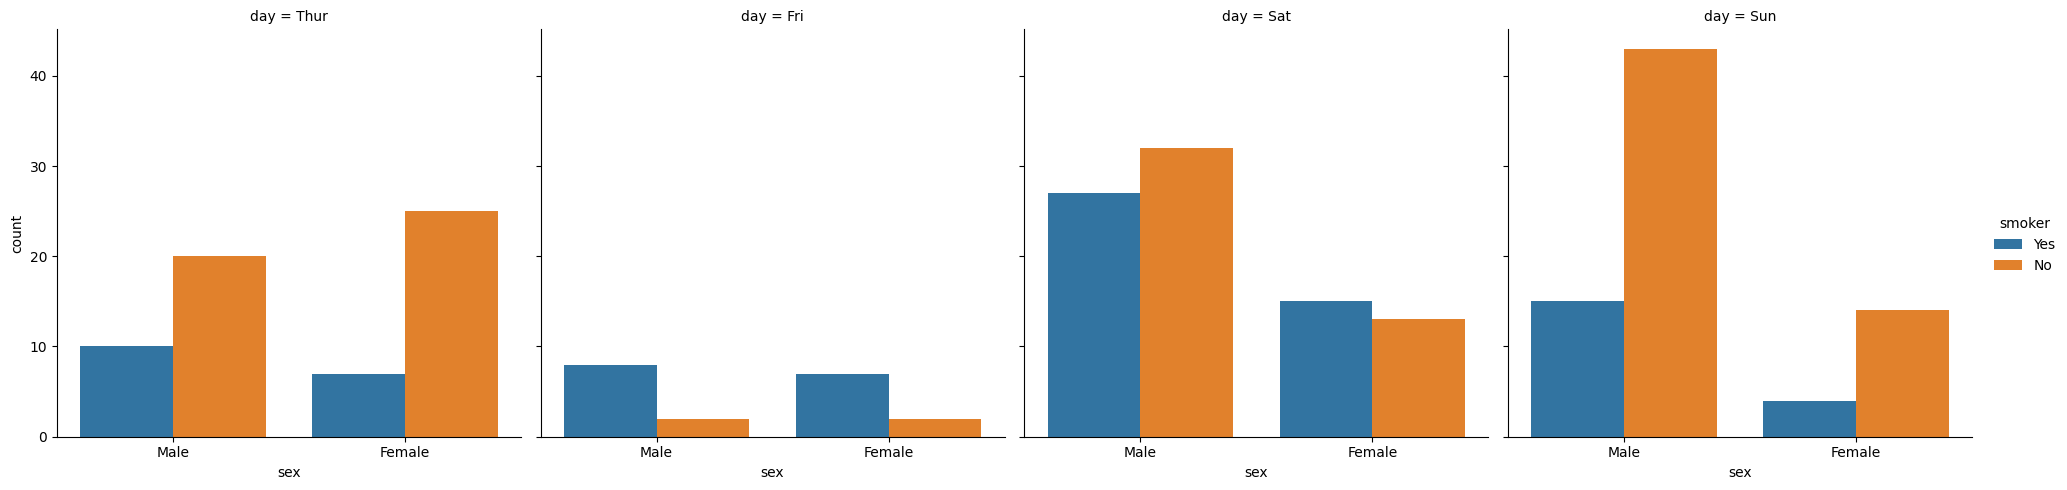

In [11]:
# facet along the columns to show a third categorical variable
sns.catplot(data=df, x='sex', hue='smoker', col='day', kind='count') # TODO kind='count' chages it to countplot
plt.show()

#obs: On fri, more males were smoking, and also more females were smoking.
# on Thurs, Sun, there is huge difference between smoker and non-smoker
# On sat, the smoker and non-smoker are quite similar

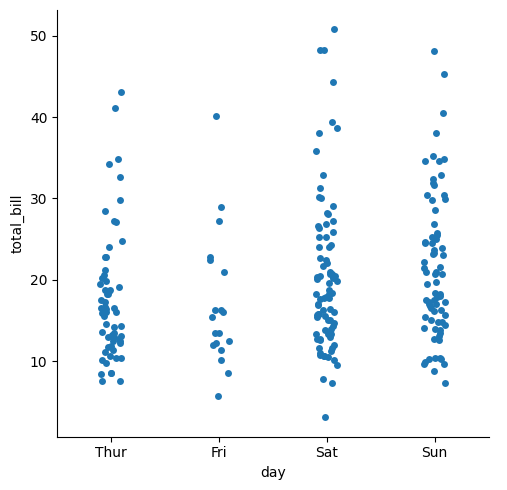

In [12]:
# show relation between numerical day and categorical variable total_bill
sns.catplot(data=df, x='day', y='total_bill')
plt.show()

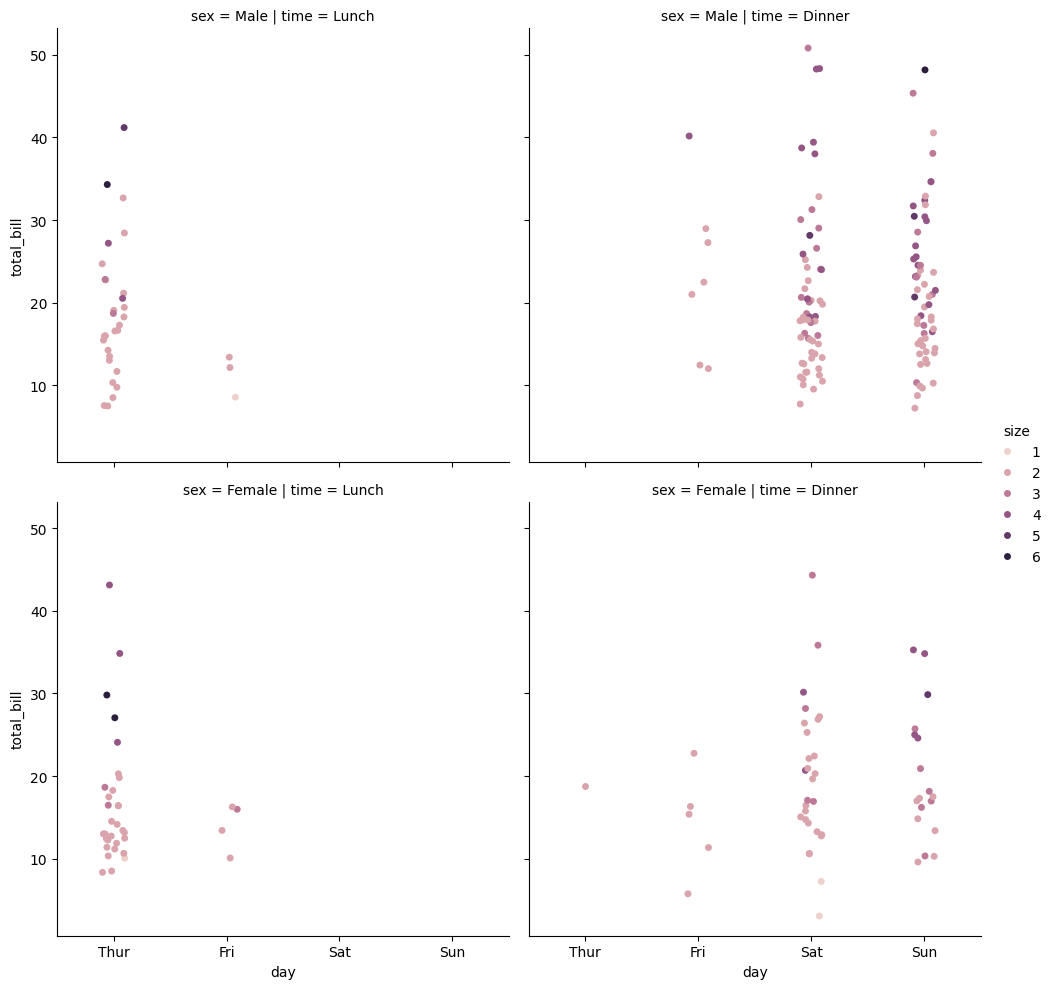

In [13]:
# Now show relation between numerical day and categorical variable total_bill, and further break it down by 
# size, time, and sex
# facet on column, grouped by 2 variables
sns.catplot( data=df, x='day', y='total_bill', hue='size', col='time', row='sex' )
plt.show()

#TODO This is good one to explain visualization advantage
# obser: no male came for lunch on Sat+Sun
# few male came for lunch on fri
# 2 -3 group of size 6 came for lunch on Thurs.

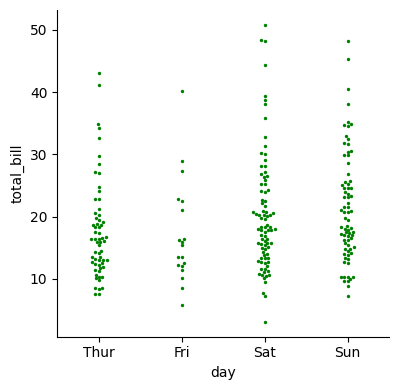

In [14]:
# use a different plot kind to visualize the same data
# s is marker size, height is plot hieght

sns.catplot(data=df, x='day', y='total_bill', color='green', height=4, kind='swarm', s=6) 
# sns.catplot(data=df, x='day', y='total_bill', color='green', height=4, kind='strip', s=6) # OR USE THIS

# sns.catplot(data=df, x='time', y='tip', color='black', height=3, kind='swarm', s=6) 
# sns.catplot(data=df, x='time', y='tip', color='black', height=3, kind='strip') # OR USE THIS
plt.show()

### SWARM PLOT
- draw a categorical scatterplot with non-overlapping points
- good complement to a box or violin plot

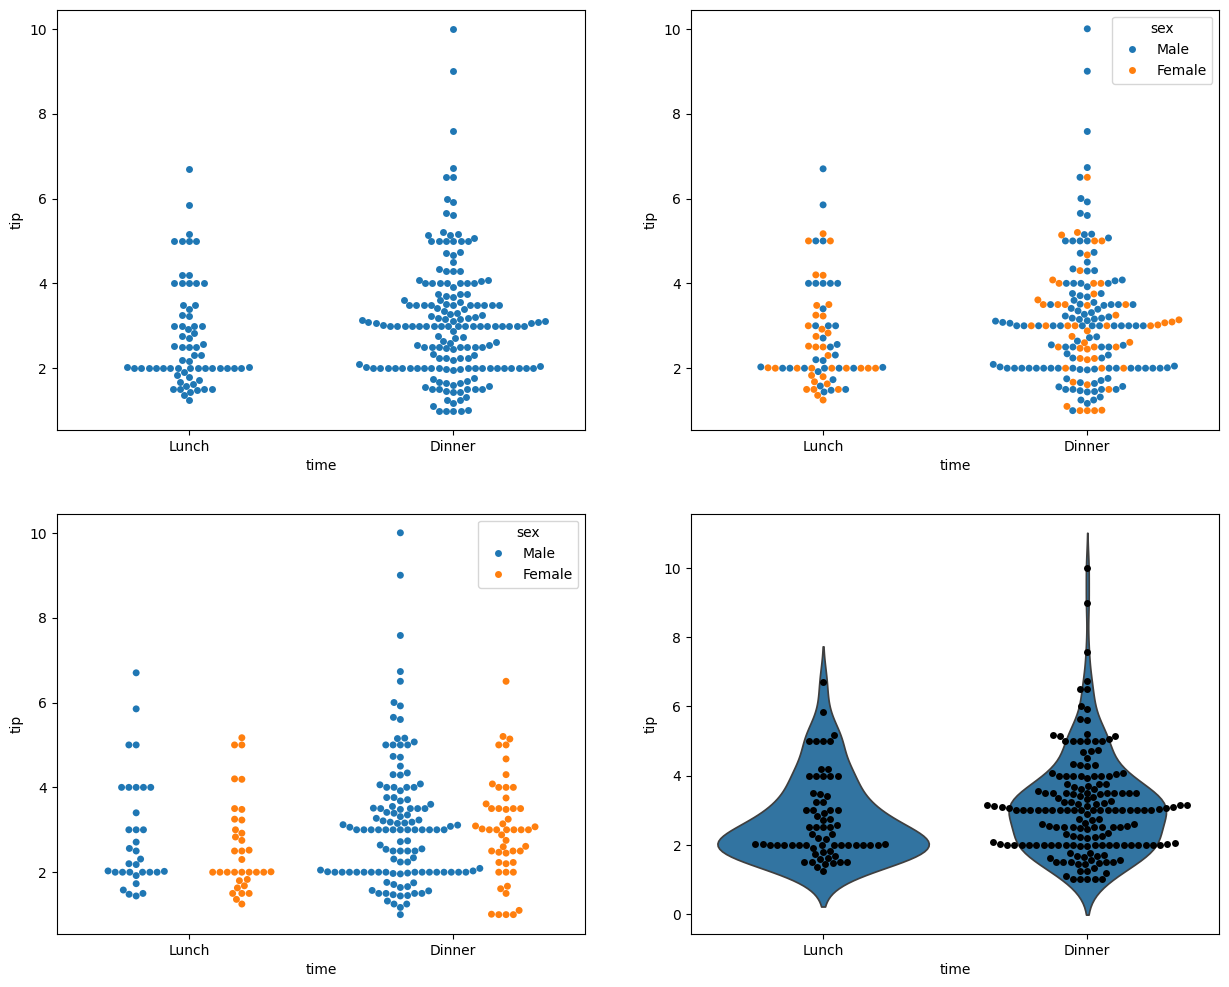

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(15,12)) # plot 4 graphs

sns.swarmplot(data=df, x='time', y='tip', ax=axes[0,0])

sns.swarmplot(data=df, x='time', y='tip', hue='sex', ax=axes[0,1]) # overlapping on sex feature

sns.swarmplot(data=df, x='time', y='tip', hue='sex', dodge=True, ax=axes[1,0]) # not overlapping on sex feature

# combine swarm and violin plot
sns.swarmplot(data=df, x='time', y='tip', color='k', ax=axes[1,1])
sns.violinplot(data=df, x='time', y='tip', inner=None, ax=axes[1,1])

plt.show()

sex
Male      64.344262
Female    35.655738
Name: proportion, dtype: float64


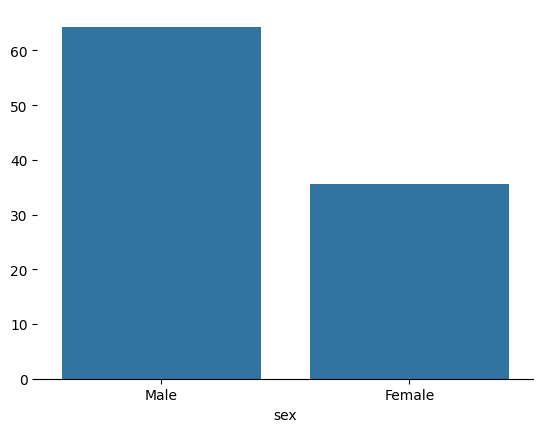

In [16]:
### (SKIP) BAR PLOTS
# Relative values - the percentage of records
perc=df['sex'].value_counts(normalize=True)*100
print(perc)
sns.barplot(x=perc.index, y=perc.values)  # Fixed
sns.despine(left='True') # no top, left and right axes spine

Man paid mostly. <br>
64% of bills were paid by man comapared to 36% paid by woman. 

## **b. Distribution of the Numerical Variable**

### * DISTPLOT

- plot a univariate distribution of observations
- combines the histogram & plots the estimated probability density function over the data. 
- calculate bin size

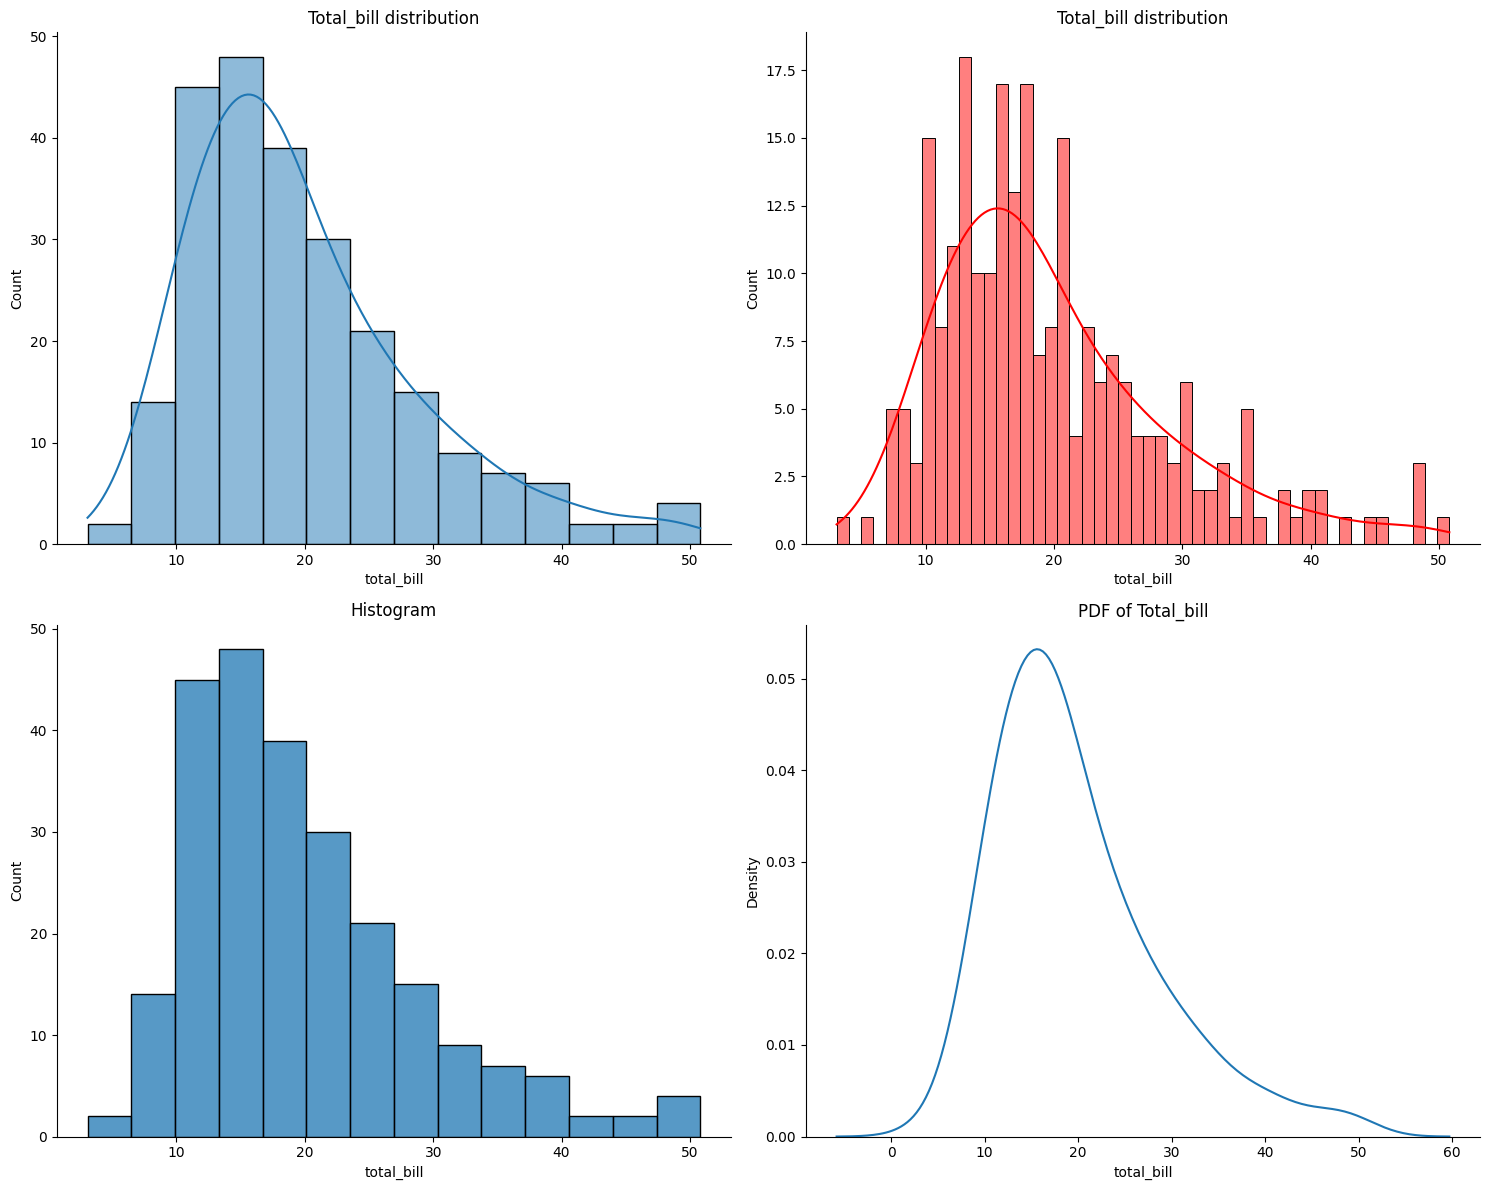

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))  # plot 4 graphs
x = df['total_bill']
# Histogram and density function
sns.histplot(x, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Total_bill distribution')

# Set number of bins and color
sns.histplot(x, kde=True, bins=50, color='r', ax=axes[0, 1])
axes[0, 1].set_title('Total_bill distribution')

# Only histogram, no density
sns.histplot(x, kde=False, ax=axes[1, 0])
axes[1, 0].set_title('Histogram')

# Only density function, no histogram
sns.kdeplot(x, ax=axes[1, 1])
axes[1, 1].set_title('PDF of Total_bill')

sns.despine()  # no top and right axes spine
plt.tight_layout()
plt.show()

The most of the bill values are in the range of 10 - 20.

### * KDE PLOT

- plot density

Text(0.5, 1.0, 'PDF of Tip')

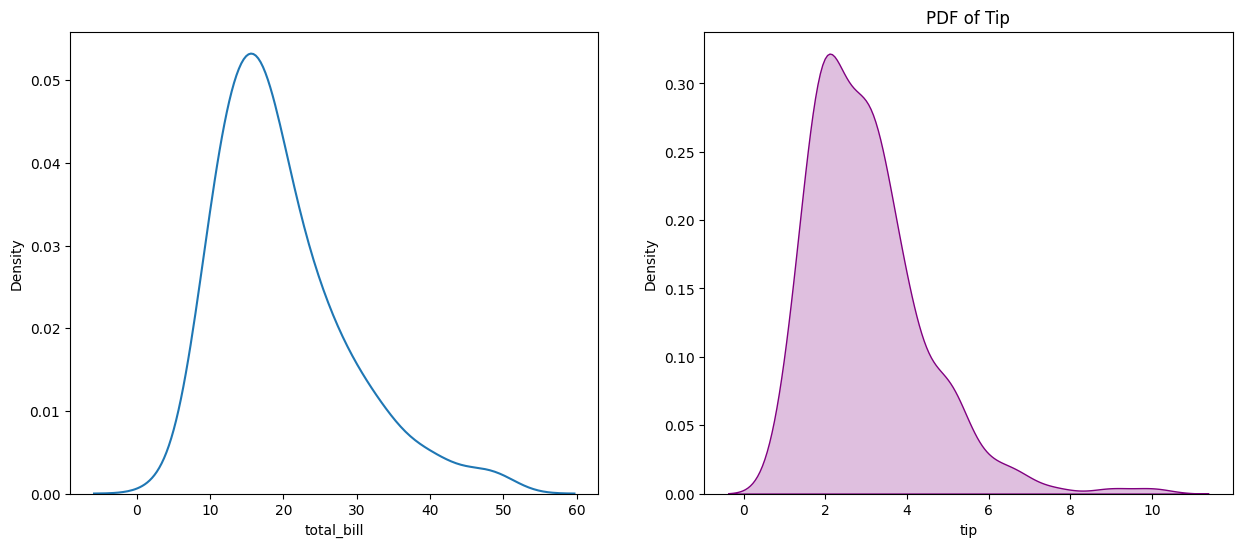

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(15,6)) # plot 2 graphs

# simple density function
sns.kdeplot(df['total_bill'], ax=axes[0])


# filled area under the curve, set color, remove legend, set title
sns.kdeplot(df['tip'], fill=True, color='purple', legend=False, ax=axes[1]).set_title('PDF of Tip') 

### * BOX-PLOT

- the box shows the quartiles of the dataset 
- the whiskers extend to show the rest of the distribution, except for points that are determined to be "outliers"

c:\Users\hi\Desktop\projects\python_projects\tutorial\tut_tensorflow\.venv\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Text(0.5, 1.0, 'Tip outliers')

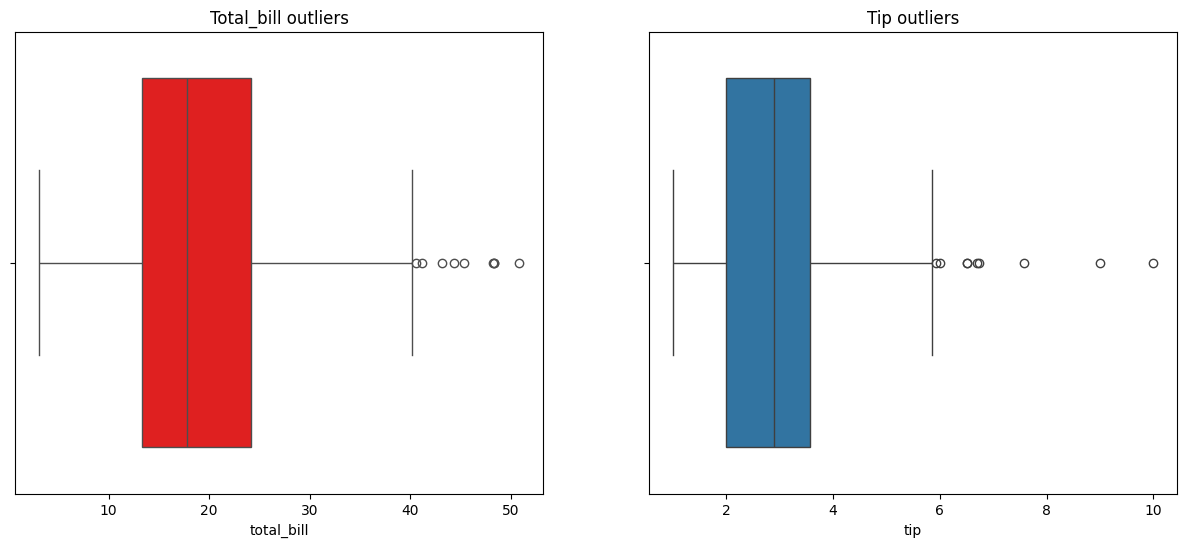

In [19]:
# detect the outliers
fig, axes = plt.subplots(1, 2,figsize=(15,6)) # plot 2 graphs

# use red color, set title
sns.boxplot(data=df, x='total_bill', color='red', ax=axes[0]).set(title='Total_bill outliers') 

# change orientation, set title
sns.boxplot(data=df, x='tip', orient='v', ax=axes[1]).set_title('Tip outliers') 

There are total_bill/tip values that 'lie' outside 'far away' from other total_bill/tip values. <br>
Both variables contain outlier candidates. <br>
"To drop or not to drop?" isn't the topic now, but it’s important to investigate the nature of the outliers before deciding.

In [61]:
# show me DF whose total_bill>=40
df[df['total_bill'] >= 40]

,total_bill,tip,sex,smoker,day,time,size,weekend
59,48.27,6.73,Male,No,Sat,Dinner,4,True
95,40.17,4.73,Male,Yes,Fri,Dinner,4,False
102,44.30,2.50,Female,Yes,Sat,Dinner,3,True
142,41.19,5.00,Male,No,Thur,Lunch,5,False
156,48.17,5.00,Male,No,Sun,Dinner,6,True
170,50.81,10.00,Male,Yes,Sat,Dinner,3,True
182,45.35,3.50,Male,Yes,Sun,Dinner,3,True
184,40.55,3.00,Male,Yes,Sun,Dinner,2,True
197,43.11,5.00,Female,Yes,Thur,Lunch,4,False
212,48.33,9.00,Male,No,Sat,Dinner,4,True


In [62]:
df[df['tip'] >= 6]

,total_bill,tip,sex,smoker,day,time,size,weekend
23,39.42,7.58,Male,No,Sat,Dinner,4,True
47,32.40,6.00,Male,No,Sun,Dinner,4,True
59,48.27,6.73,Male,No,Sat,Dinner,4,True
141,34.30,6.70,Male,No,Thur,Lunch,6,False
170,50.81,10.00,Male,Yes,Sat,Dinner,3,True
183,23.17,6.50,Male,Yes,Sun,Dinner,4,True
212,48.33,9.00,Male,No,Sat,Dinner,4,True
214,28.17,6.50,Female,Yes,Sat,Dinner,3,True


### * VIOLIN PLOT

<Axes: ylabel='tip'>

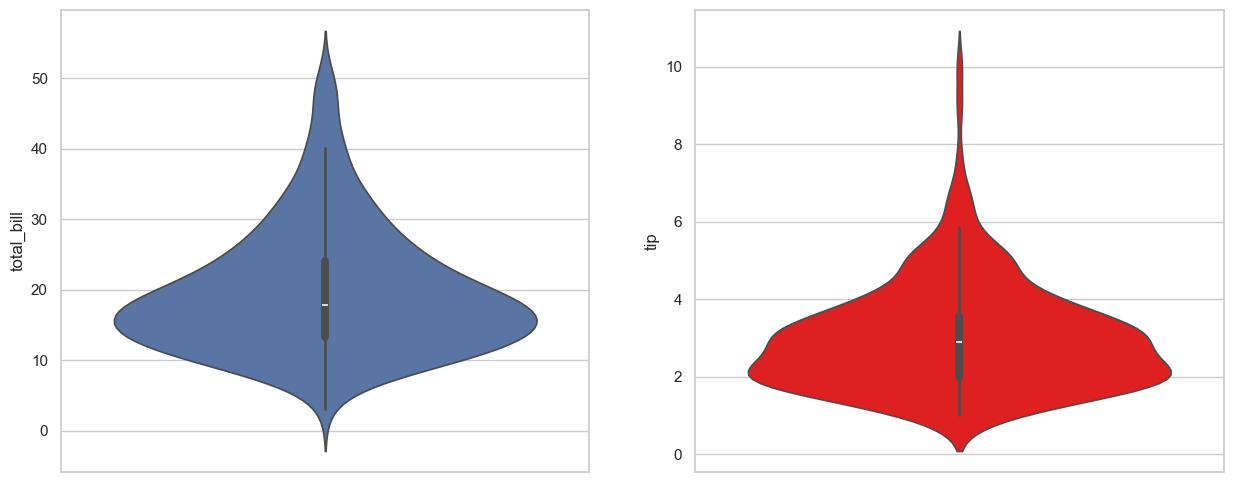

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(15,6)) # plot 2 graphs 

# single horizontal violinplot
sns.violinplot(df['total_bill'], ax=axes[0])

# change orientation, set color
sns.violinplot(df['tip'], orient='v', color='red', ax=axes[1])

## **c. Relationship between 2 Numerical Variables**

### * LINE PLOT

- usually show trends during the time

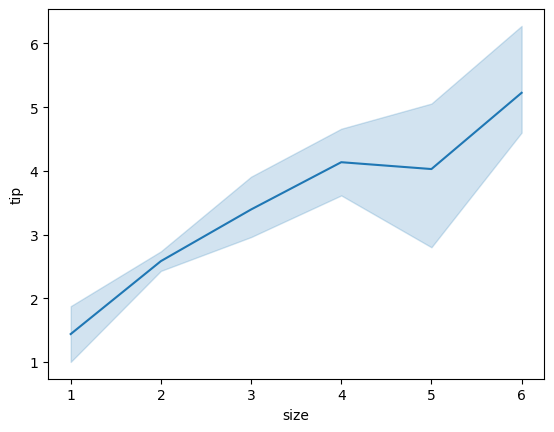

In [23]:
# line plot with confidence interval, set axes and title
sns.lineplot( data=df, x='size', y='tip')# TODO
plt.show()

# TODO: the shades show the possible ranges of tips based on size. For example a group of 5 would pay tip anywhee between
# 3 to 5. And it is very likely that they would pay 4 

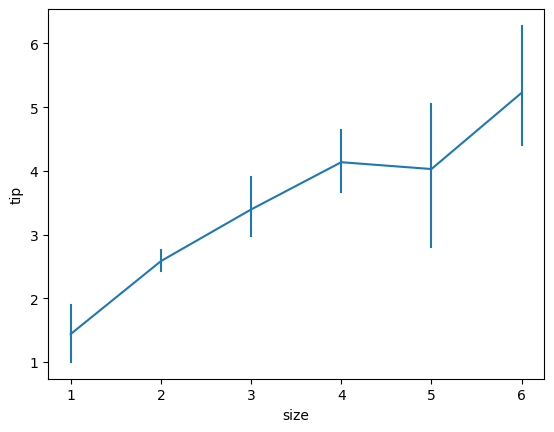

In [24]:
# Now I want to see the error bars and plot the standard error 
sns.lineplot( data=df, x='size', y='tip', err_style='bars' ) 
plt.show()

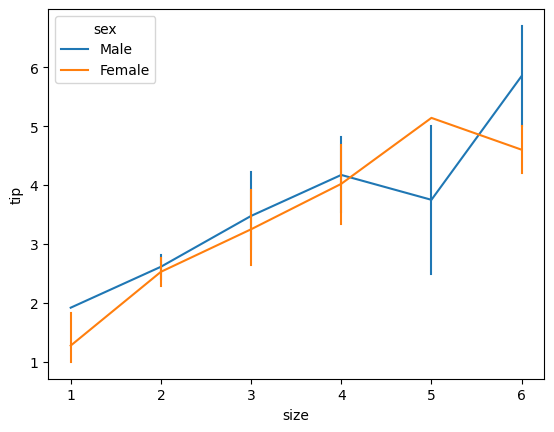

In [25]:
# Now I want to see the error bars and plot the standard error for male and female
sns.lineplot( data=df, x='size', y='tip', hue='sex', err_style='bars' ) # NOTE: change hue to time
plt.show()

# obs: it appears that size=1, then people tip more for lunch than dinner
# if size=4, tips for lunch and dinner are quite similar
# if size-5, then tip for lunch is higher than dinner

### SCATTER PLOT 
- interaction between the two numeric columns

<Axes: xlabel='total_bill', ylabel='tip'>

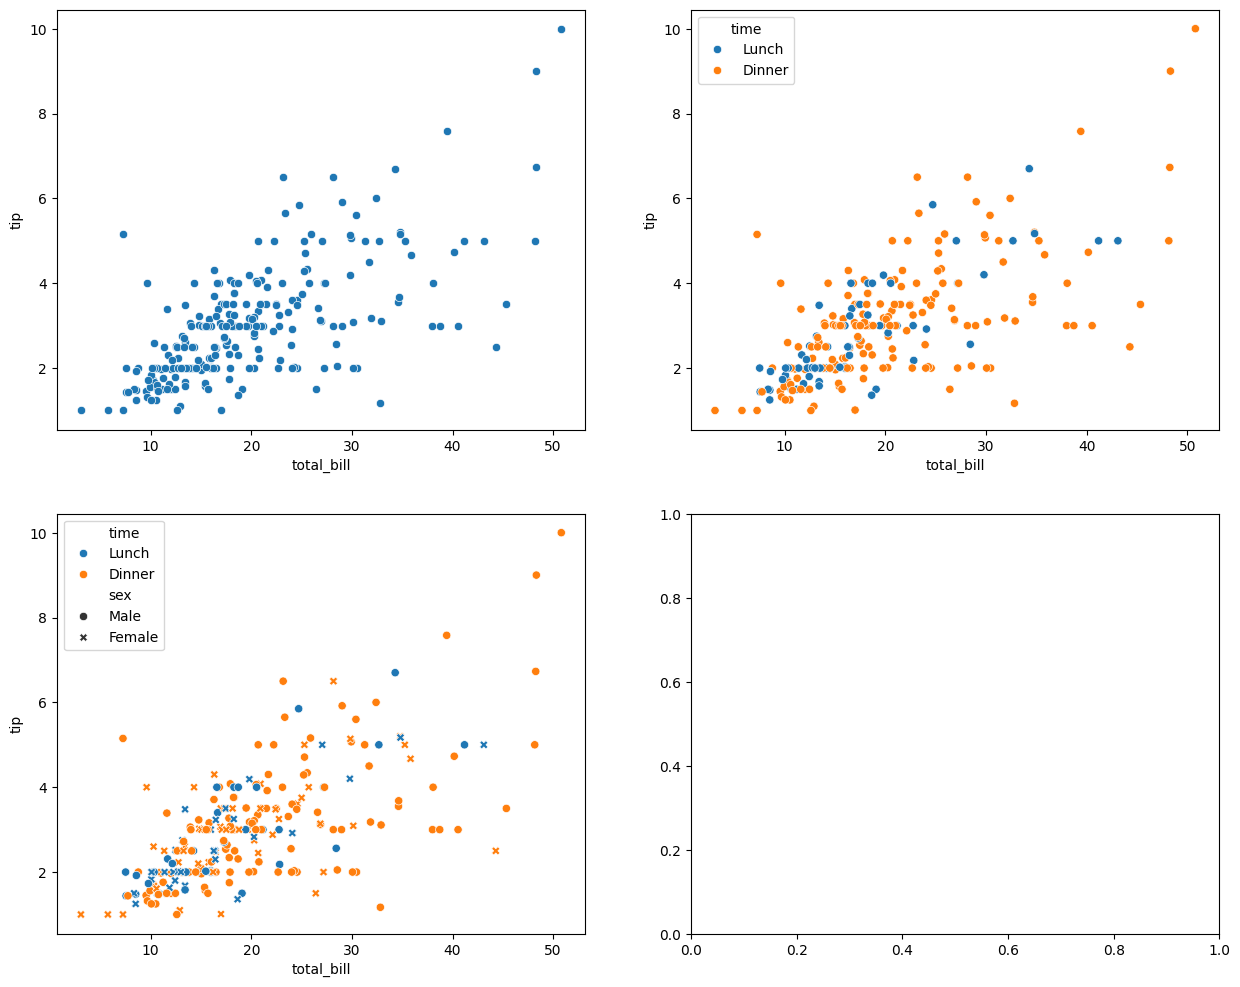

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(15,12)) # plot 3 graphs 

# simple scatter plot between two variables 
sns.scatterplot(data=df, x='total_bill', y='tip', ax=axes[0,0])

# group by time and show the groups with different colors
sns.scatterplot(data=df, x ='total_bill', y ='tip', hue= 'time', ax=axes[0,1])

sns.scatterplot(data=df, x ='total_bill', y ='tip', hue='time', style= 'sex', ax=axes[1,0])

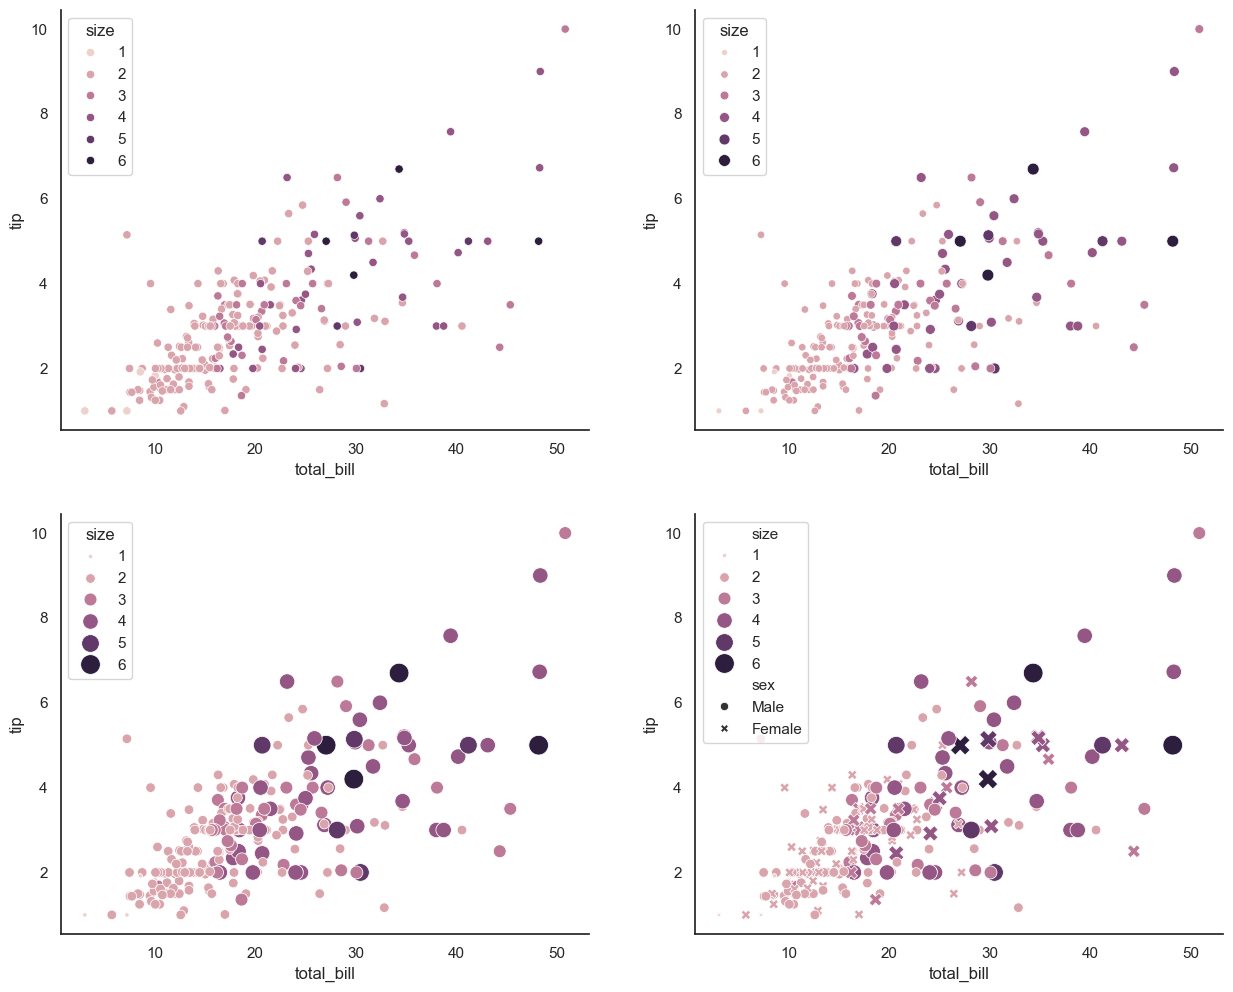

In [27]:
sns.set(style='white') #set background

fig, axes = plt.subplots(2, 2, figsize=(15,12)) # plot 4 graphs 

# vary colors to show one grouping variable-size
sns.scatterplot( data=df,x='total_bill', y='tip', hue='size', ax=axes[0,0])

# quantitative variable-size by varying the size of the points
sns.scatterplot( data=df, x='total_bill', y='tip', hue='size', size='size', ax=axes[0,1])

# set the minimum and maximum point size and show all sizes in legend
sns.scatterplot( data=df, x='total_bill', y='tip', hue='size', size='size', sizes=(10,200), ax=axes[1,0])

# vary colors and markers to show two different grouping variables -size,sex
sns.scatterplot( data=df, x='total_bill', y='tip', hue='size', size='size', style='sex', sizes=(10,200), ax=axes[1,1])
sns.despine() 

### * RELPLOT

- show the **relationship** between two variables with semantic mappings of subsets
- could be used instead of scatter plot 

In [28]:
sns.set(style='whitegrid') # set background for following graphs

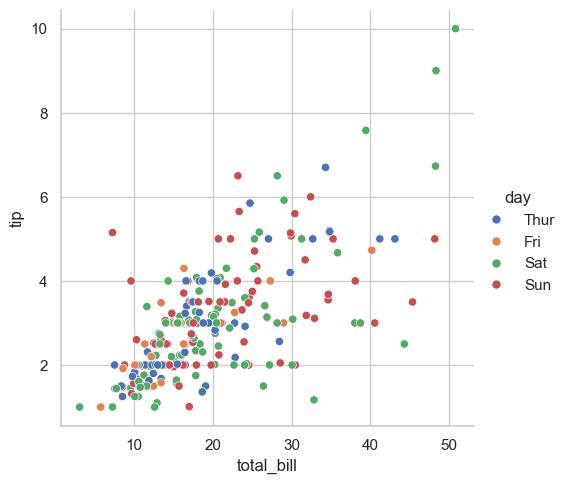

In [29]:
# draw a single facet, set axes 
sns.relplot( data = df, x='total_bill', y='tip', hue='day')

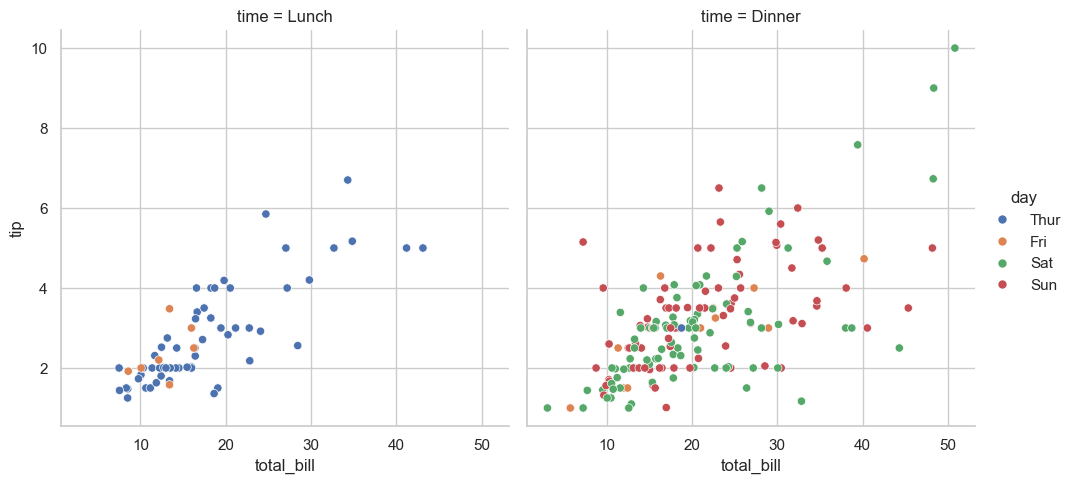

In [30]:
# facet on the columns with another variable
sns.relplot( data = df, x='total_bill', y='tip', hue='day', col='time')

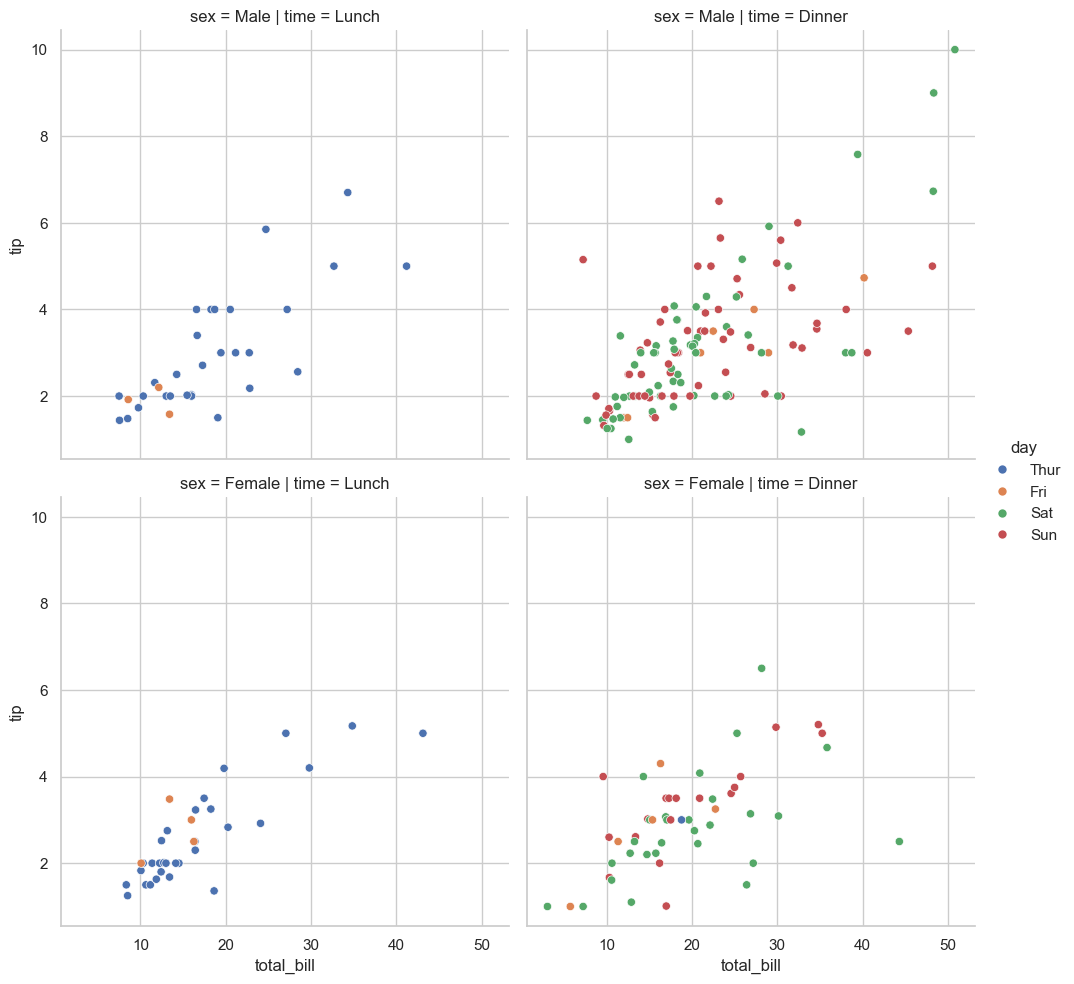

In [31]:
# facet on the columns and rows
sns.relplot( data = df, x='total_bill', y='tip', hue='day', col='time', row='sex')

### * JOINT PLOT

- take two variables and create histogram and scatterplot together

In [32]:
sns.set(style='white') # set background and palette for following graphs

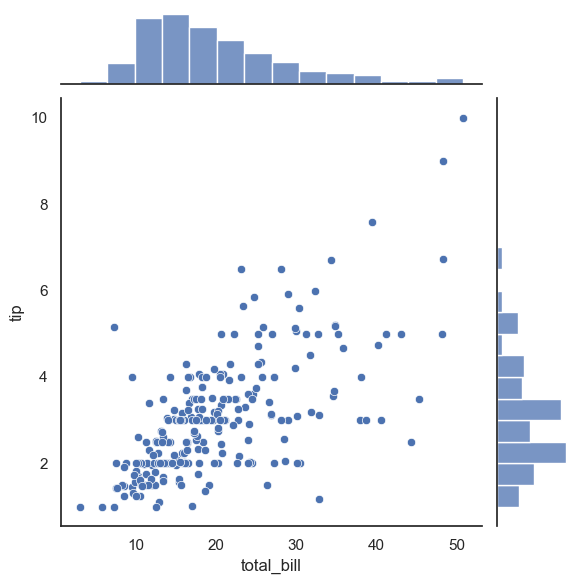

In [33]:
# scatterplot with marginal histograms
sns.jointplot(data=df, x='total_bill', y='tip')
plt.show()

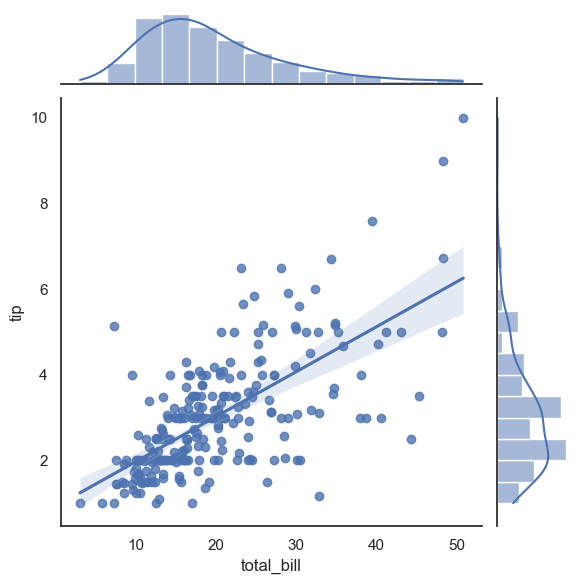

In [34]:
# add regression line and density function:
sns.jointplot(data=df, x='total_bill', y='tip',  kind='reg')
plt.show()

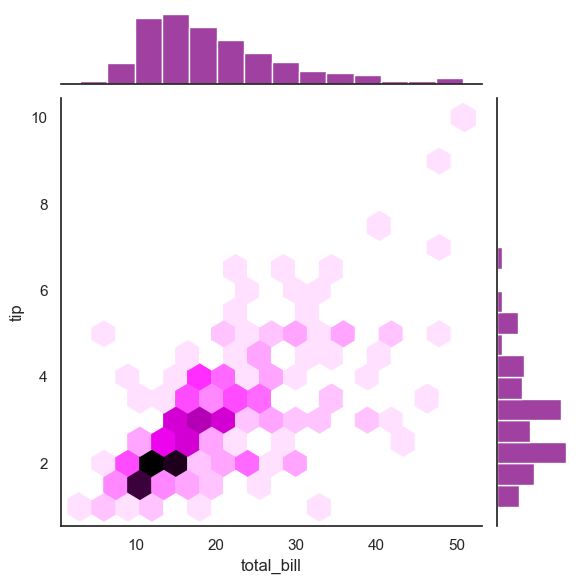

In [35]:
# replace the scatterplot with “hexbin” plot - shows the counts of observations that fall within hexagonal bins
sns.jointplot(x='total_bill', y='tip', data=df, kind='hex', color='purple')

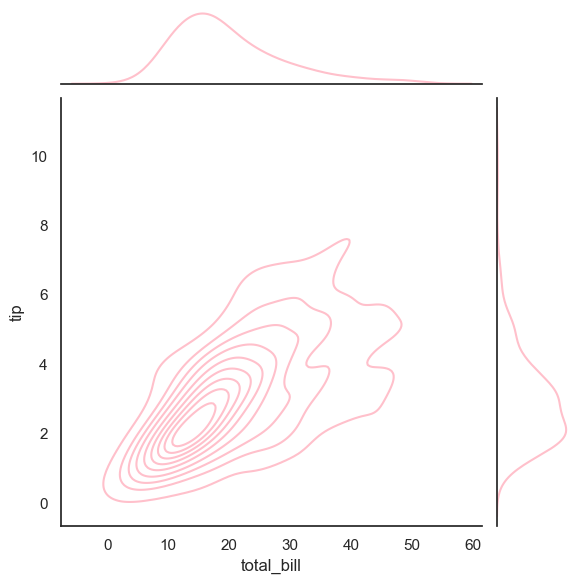

In [36]:
# (SKIP) replace the scatterplot and histograms with density estimates
sns.jointplot(x='total_bill', y='tip', data=df, kind='kde', color='pink')

### * KDE PLOT

- fit and plot a univariate or bivariate density estimate

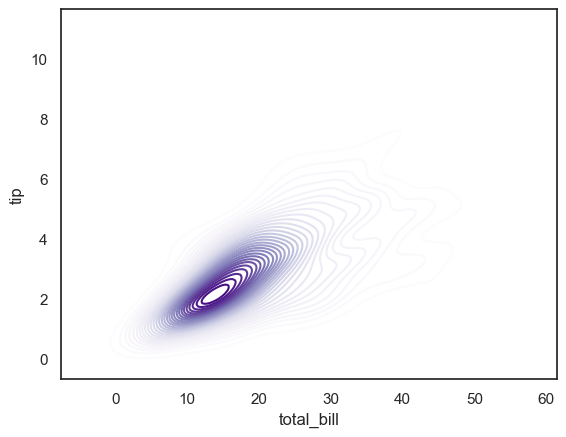

In [37]:
# bivariate densiti, more contour levels and a different color palette

sns.kdeplot(x='total_bill', y='tip', data=df,levels=30, cmap='Purples')
# sns.kdeplot(x=df.total_bill, y=df.tip, levels=30, cmap='Purples', fill=True) # or use this one
plt.show()

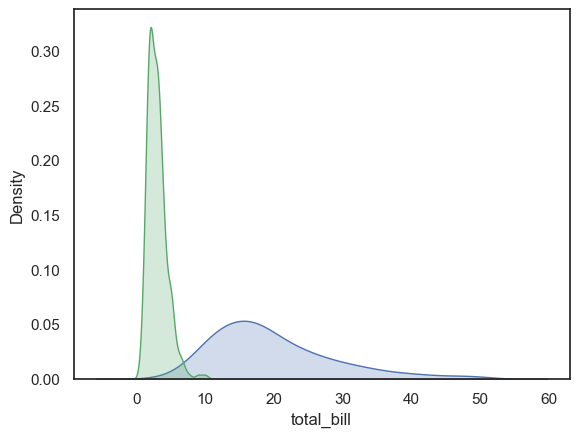

In [38]:
# 2 density function on same graph
# shade under the density curve, use a different color
sns.kdeplot(data=df, x='total_bill', fill=True, color='b')
sns.kdeplot(data=df, x='tip', fill=True, color='g')
plt.show()

<Axes: ylabel='Density'>

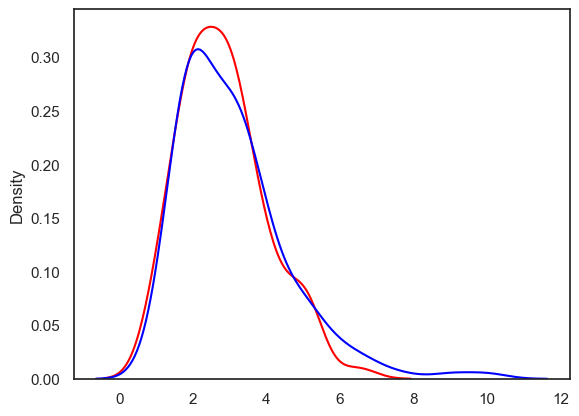

In [39]:
# (SKIP) don't shade under the density curve, use a different color
female_tip=df[df['sex'] == 'Female'].tip.values
male_tip=df[df['sex'] == 'Male'].tip.values

sns.kdeplot(female_tip, color='red')
sns.kdeplot(male_tip, color='blue')

### (SKIP )LM PLOT

- plot data and regression model

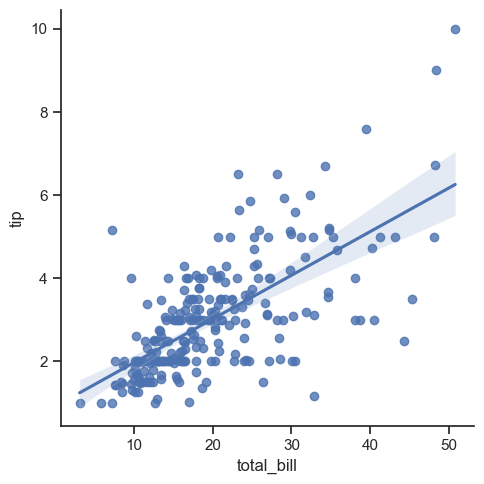

In [40]:
# SKIP
sns.set(style='ticks')

# simple linear relationship between two variables
sns.lmplot(x='total_bill', y='tip', data=df)

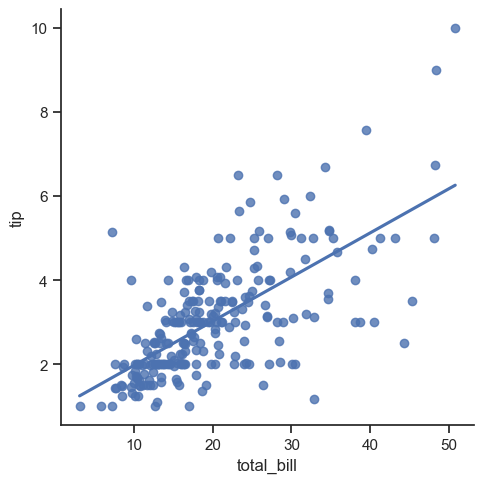

In [41]:
# regression line without confidence interval
sns.lmplot(x='total_bill', y='tip', data=df, ci=None)

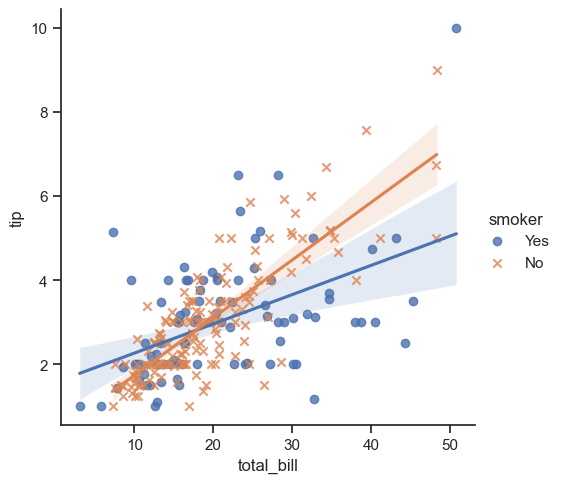

In [42]:
# third variable, levels in different colors with markers
sns.lmplot(x='total_bill', y='tip', data=df, hue='smoker', markers=['o','x'])

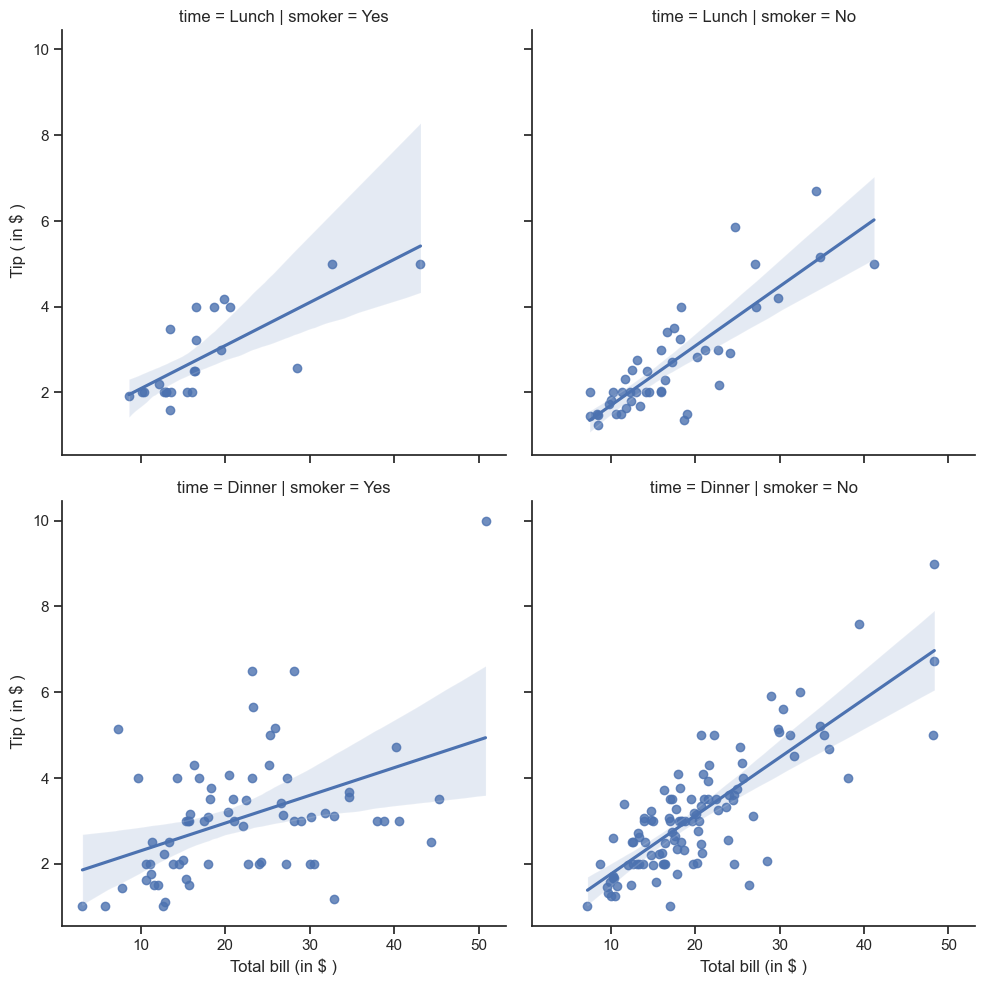

In [43]:
# facet on the columns and rows, set name of axes
sns.lmplot(x='total_bill', y='tip', data=df, col='smoker',row='time').set_axis_labels('Total bill (in $ )', ' Tip ( in $ )')

### HEATMAP

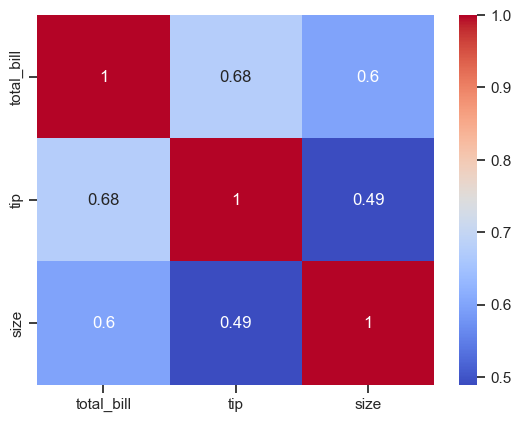

In [44]:
# visualize the correlation matrix
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
# plt.title("Correlation Heatmap")
plt.show()

### * PAIR PLOT

- relationship between numeric columns in the form of multiple scatter plots

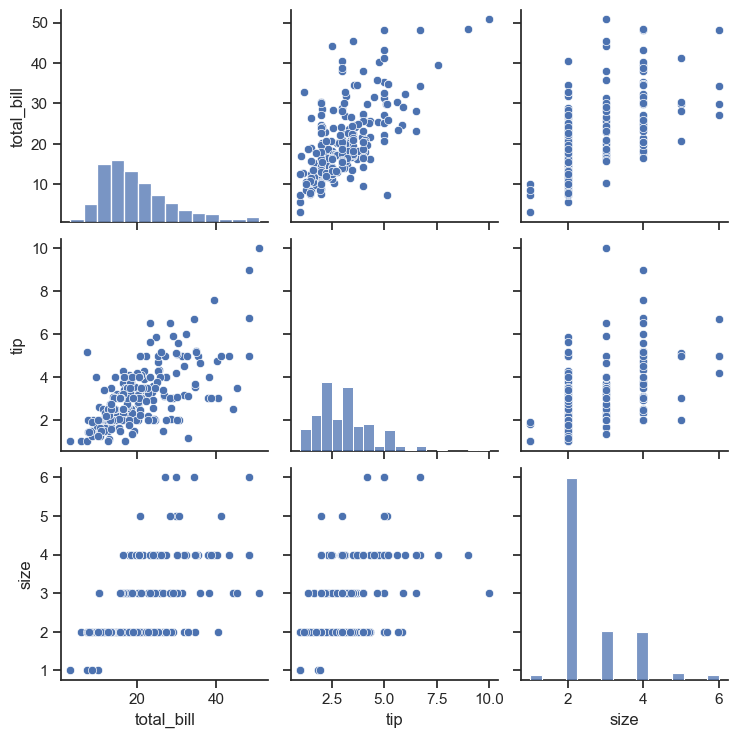

In [45]:
# simple paiplot - all numerical varibles, scatter plots and histograms on diagonal
sns.pairplot(df)
plt.show()

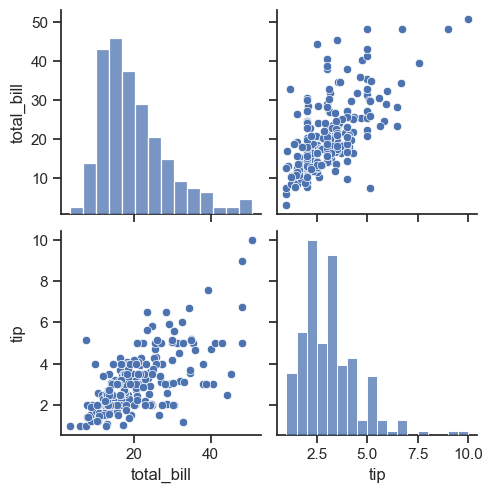

In [46]:
# select wanted variables
sns.pairplot(df[['total_bill','tip']])
plt.show()

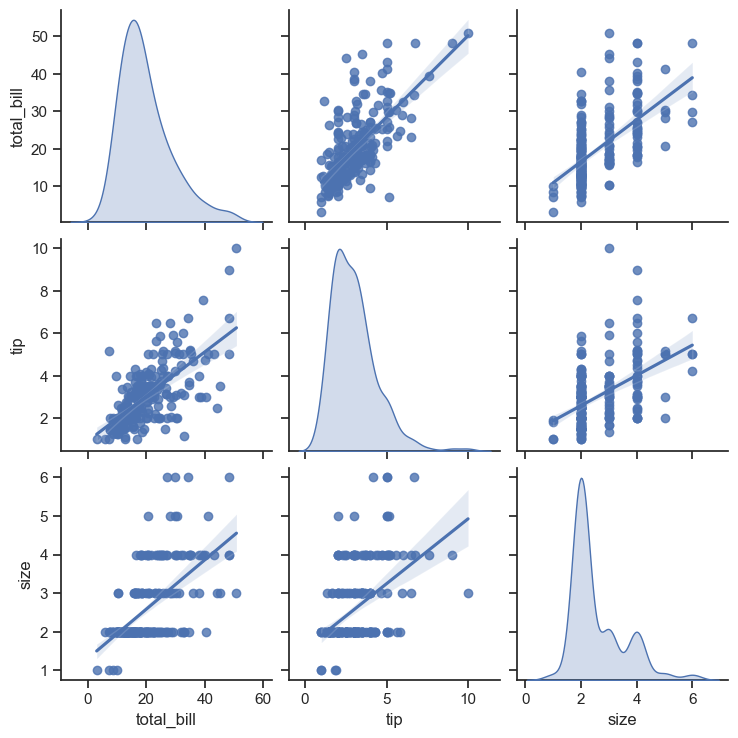

In [47]:
# fit linear regression models to the scatter plots, show density plots on diagonal
sns.pairplot(df, kind='reg', diag_kind="kde")
plt.show()

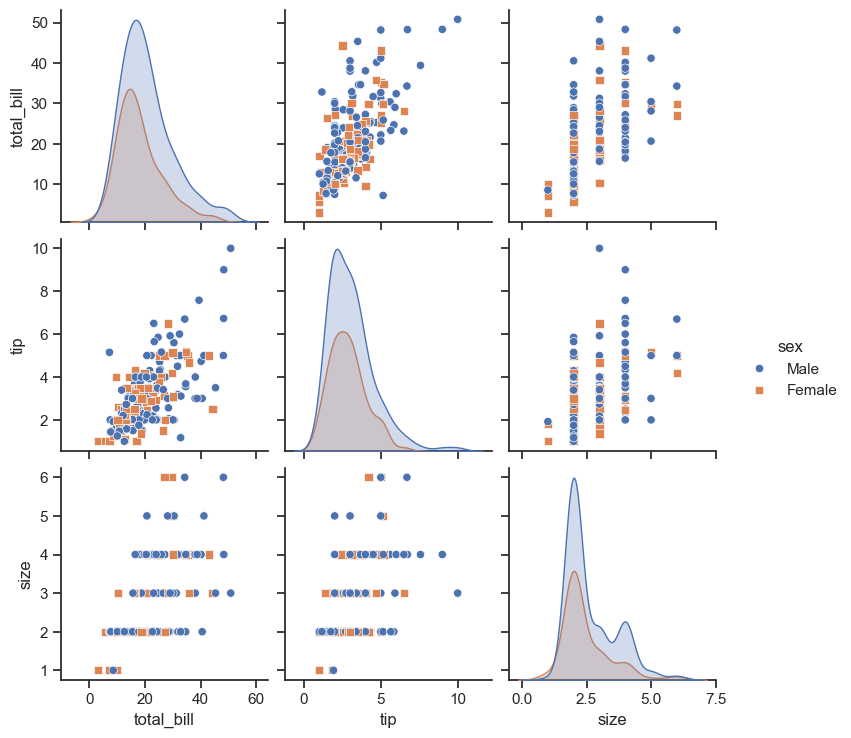

In [48]:
# set markers for different levels
sns.pairplot(df, hue='sex', markers=["o", "s"])
plt.show()

### * FACETGRID

- multi-plot grid for plotting conditional relationships.

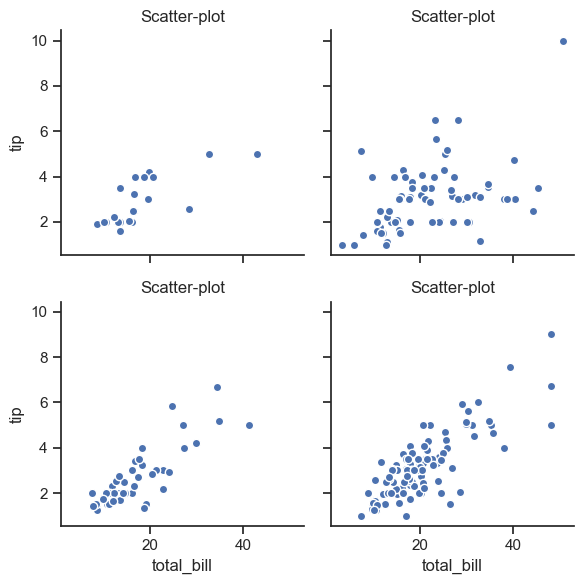

In [49]:
# facets on column and row
g = sns.FacetGrid(df, col='time',  row='smoker')
g = g.map(plt.scatter, 'total_bill', 'tip', edgecolor='w').set_titles('Scatter-plot')

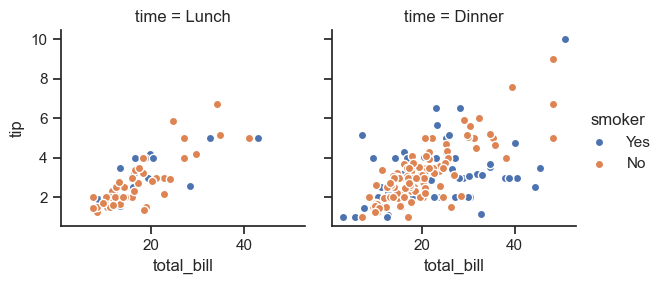

In [50]:
# facets on column, with hue represent levels of a variable in different colors
g=sns.FacetGrid(df, col='time',  hue='smoker')
g = (g.map(plt.scatter, 'total_bill', 'tip', edgecolor='w').add_legend())

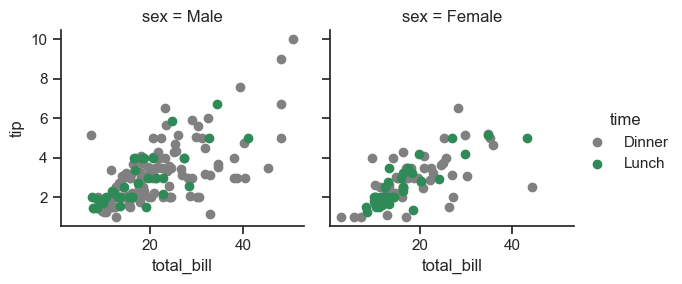

In [51]:
pal = dict(Lunch='seagreen', Dinner='gray')

g = sns.FacetGrid(df, col='sex', hue='time', palette=pal, hue_order=['Dinner', 'Lunch'])
g = (g.map(plt.scatter, 'total_bill', 'tip').add_legend())

## **d. Relationship between Numerical and Categorical Variables**

### * POINT PLOT

- show point estimates and confidence intervals using scatter plot glyphs
- can be more useful than bar plots for focusing comparisons between different levels of one or more categorical variables. 
- show how the relationship between levels of one categorical variable changes across levels of a second categorical variable

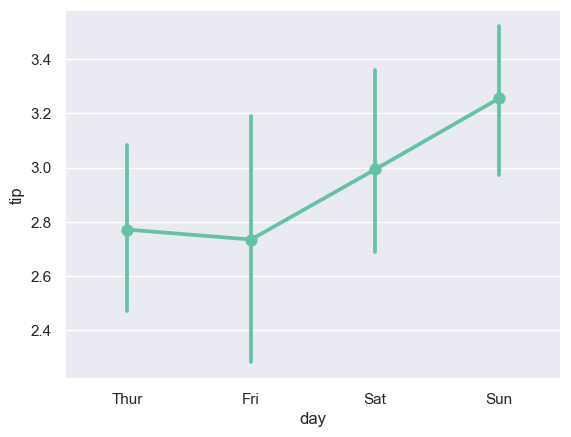

In [52]:
sns.set(style='darkgrid',palette='Set2') # set background and palette

# grouped by a categorical variable
sns.pointplot(data=df, x='day', y='tip')
plt.show()

<Axes: xlabel='day', ylabel='tip'>

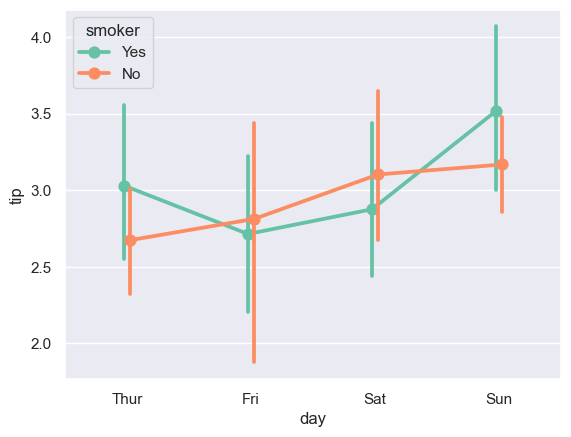

In [53]:
# grouped by a two variables,separate lines
sns.pointplot(x='day', y='tip', data=df, hue='smoker', dodge=True)

<Axes: xlabel='day', ylabel='tip'>

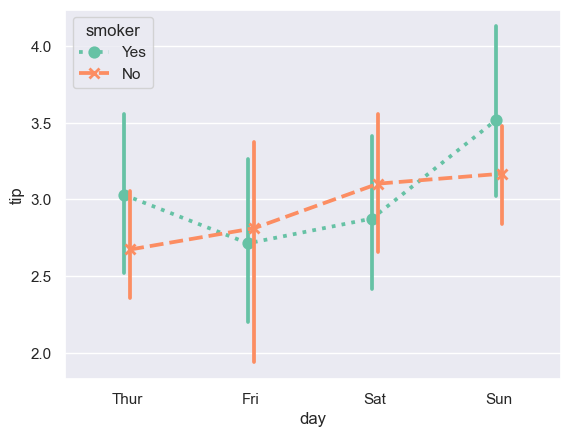

In [54]:
# separate the points for different hue levels with different marker and line style
sns.pointplot(x='day', y='tip', data=df, hue='smoker', dodge=True, markers=['o','x'], linestyles=['dotted','--'])

<Axes: xlabel='tip', ylabel='day'>

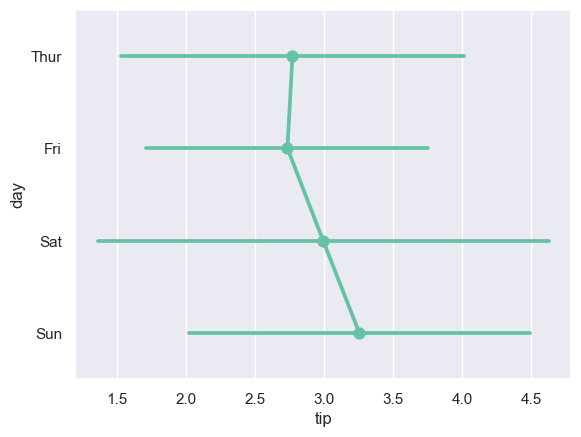

In [55]:
# show standard deviation of observations instead of a confidence interval
sns.pointplot(x='tip', y='day', data=df, errorbar='sd')

### * BAR PLOT

- represents an estimate of central tendency for a numeric variable
- shows only the mean (or other estimator) value, not the distribution of values at each level of the categorical variables (like a box or violin plot)

C:\Users\hi\AppData\Local\Temp\ipykernel_19200\1674605058.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='day', y='tip', data=df, hue='sex', ci='sd', ax=axes[1,0])


<Axes: xlabel='day', ylabel='total_bill'>

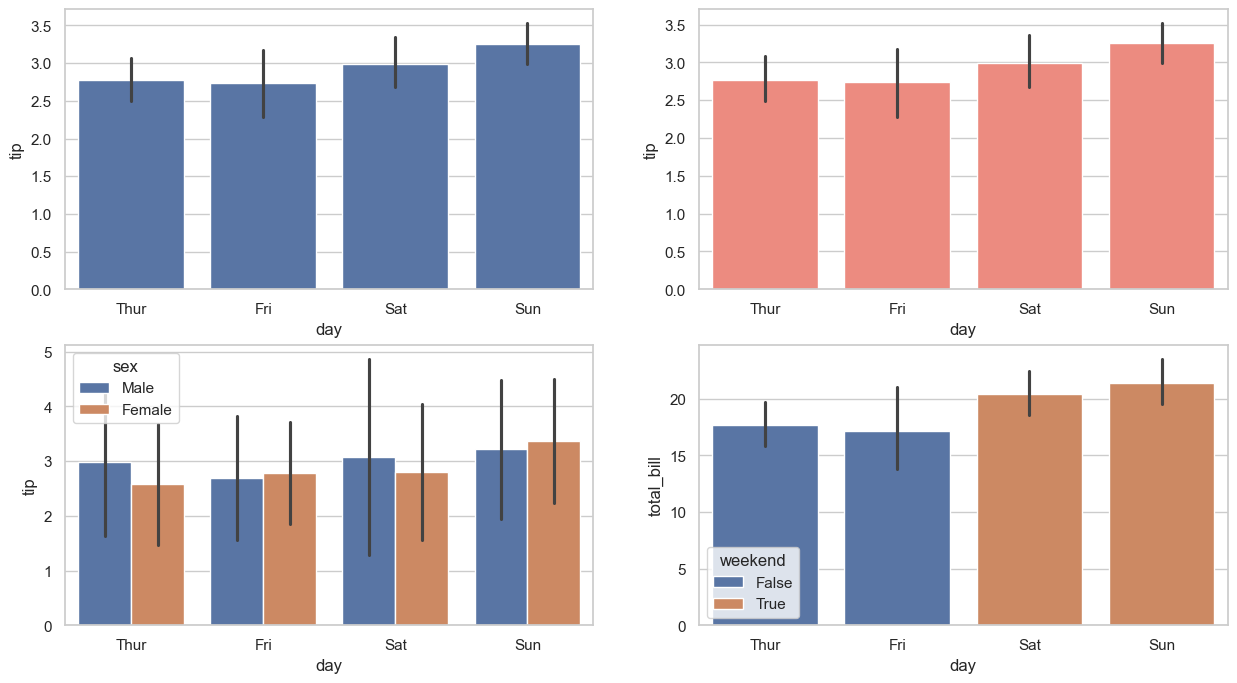

In [56]:
sns.set(style='whitegrid')# set background

fig, axes = plt.subplots(2, 2, figsize=(15,8)) # plot 4 graphs

# grouped by a categorical variable
sns.barplot(x='day', y='tip', data=df, ax=axes[0,0])

# all bars in a single color
sns.barplot(x='day', y='tip', data=df, color='salmon', saturation=.8, ax=axes[0,1])

# grouped by a two variables, show standard deviation of observations instead of a confidence interval
sns.barplot(x='day', y='tip', data=df, hue='sex', ci='sd', ax=axes[1,0])

# grouped by new variable 
df['weekend'] = df['day'].isin(['Sat', 'Sun'])
sns.barplot(x='day', y='total_bill', hue="weekend", data=df, dodge=False, ax=axes[1,1]) 

###  * BOX-PLOT

- show distributions with respect to categories
- box shows the quartiles 
- whiskers show the rest of the distribution, except for points that are determined to be 'outliers'

<Axes: xlabel='time', ylabel='total_bill'>

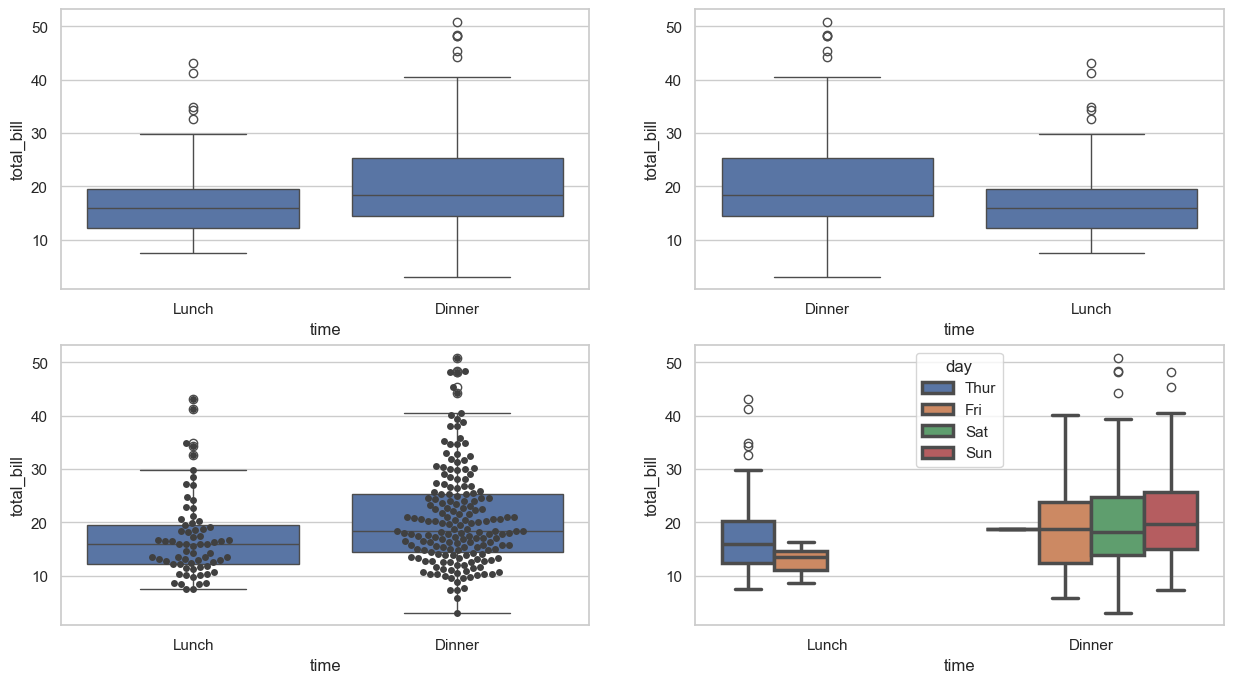

In [57]:
fig, axes = plt.subplots(2, 2, figsize=(15,8)) # plot 4 graphs

# the quartile information for a numerical column grouped by categorical column
sns.boxplot(x='time', y='total_bill', data = df, ax=axes[0,0])

# set unique categorical label in different order
sns.boxplot(x='time', y='total_bill', data=df,order=['Dinner', 'Lunch'], ax=axes[0,1])

# boxplot with swarmplot
sns.boxplot(  x = 'time', y = 'total_bill', data = df, ax=axes[1,0])
sns.swarmplot(x = 'time', y = 'total_bill', data = df, color='.25', ax=axes[1,0])

# boxplot with nested grouping by two categorical variables and ticker line
sns.boxplot(x='time', y='total_bill', data = df, hue='day', linewidth=2.5, ax=axes[1,1])

###  * VIOLIN PLOT

- combination of boxplot and KDE plot.
- shows the distribution of quantitative data across several levels of one (or more) categorical variables 
- show multiple distributions of data at once

C:\Users\hi\AppData\Local\Temp\ipykernel_19200\496542866.py:16: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x='day', y='total_bill', data=df, hue='sex', palette='muted', split=True, scale='count', ax=axes[2,0])
C:\Users\hi\AppData\Local\Temp\ipykernel_19200\496542866.py:19: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x='day', y='total_bill', data=df, hue='sex', palette='muted', split=True, scale='count', inner='stick', ax=axes[2,1])


<Axes: xlabel='day', ylabel='total_bill'>

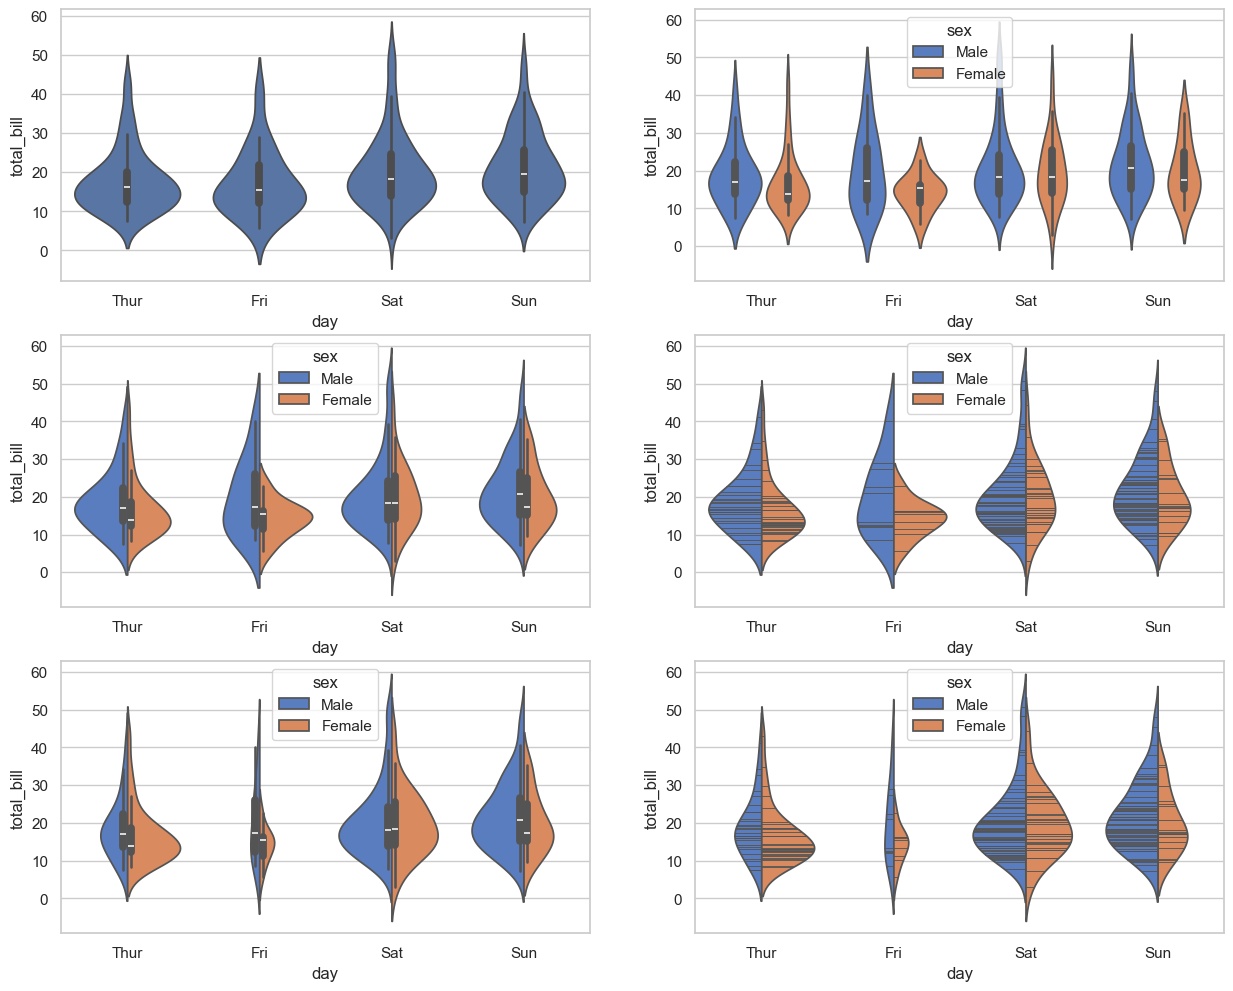

In [58]:
fig, axes = plt.subplots(3, 2, figsize=(15,12)) # plot 6 graphs

# vertical violinplot grouped by a categorical variable
sns.violinplot(x='day', y='total_bill', data=df, ax=axes[0,0])

# vertical violinplot grouped by a categorical variable, set palette
sns.violinplot(x='day', y='total_bill', data=df, hue='sex', palette='muted', ax=axes[0,1])

# split violins to compare the across the hue variable
sns.violinplot(x='day', y='total_bill', data=df, hue='sex', palette='muted', split=True, ax=axes[1,0]) 

# show each observation with a stick inside the violin
sns.violinplot(x='day', y='total_bill', data=df, hue='sex', palette='muted', split=True, inner='stick', ax=axes[1,1])

# scale the violin width by the number of observations in each bin
sns.violinplot(x='day', y='total_bill', data=df, hue='sex', palette='muted', split=True, scale='count', ax=axes[2,0]) 

#Scale the density relative to the counts across all bins
sns.violinplot(x='day', y='total_bill', data=df, hue='sex', palette='muted', split=True, scale='count', inner='stick', ax=axes[2,1])

### * FACETGRID

- multi-plot grid for plotting conditional relationships

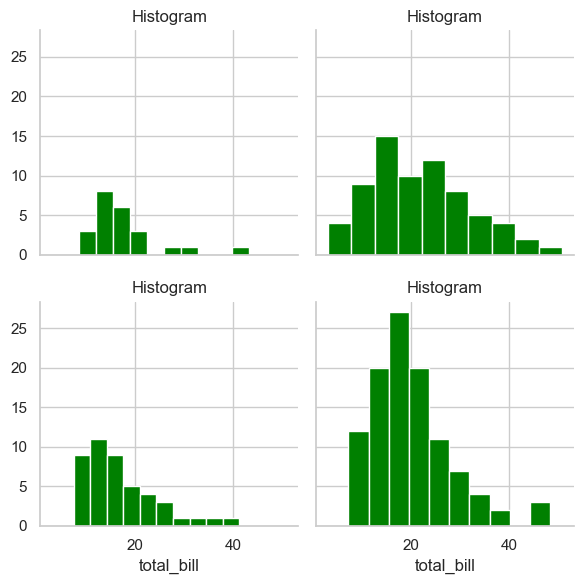

In [59]:
# univariate plot on each facet
g = sns.FacetGrid(df, col='time',  row='smoker')
g = g.map(plt.hist, 'total_bill', color='green').set_titles('Histogram')

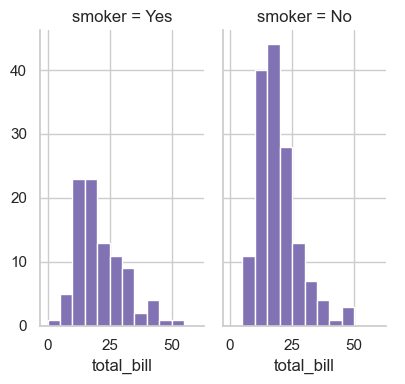

In [60]:
# specify the order, change the height and aspect ratio of each facet
bins = np.arange(0, 65, 5)
g = sns.FacetGrid(df, col='smoker', col_order=['Yes', 'No'], height=4, aspect=.5)
g = g.map(plt.hist, 'total_bill', bins=bins, color='m').add_legend()